<a href="https://colab.research.google.com/github/gayecolakoglu/DiabeticRetinopathyDetection/blob/main/Bayesian_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
#https://medium.com/@pierre.beaujuge/bayesian-optimization-on-the-head-classifier-of-pre-trained-cnns-using-the-cifar10-dataset-48c440b67b2c
# Install GPy, GPyOpt
!pip install GPy==1.9.8
!pip install GPyOpt==1.2.1
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 9.0 MB/s 
  Created wheel for GPy: filename=GPy-1.9.8-cp37-cp37m-linux_x86_64.whl size=2619352 sha256=81da5800769a4e1a1cadde5beaeca30c042dcea54bccd0b86f9c73b68fa038d8
  Stored in directory: /root/.cache/pip/wheels/23/6d/58/90d8e44f8fd9f442de81992a427a5947a6e5f7b78cd65acd9a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=e58622326b0b8ce470e3a33d38018e14b942fe61d62c4f765dea9974df8a7c68
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.1-py3-none-any.whl size=73656 sha

In [ ]:
#https://stackoverflow.com/questions/54333202/how-to-split-an-image-dataset-in-x-train-y-train-x-test-y-test

'''import os

X = []
y = []
base_dir = '/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/'
for f in sorted(os.listdir(base_dir)):
  if os.path.isdir(base_dir+f):
      print(f"{f} is a target class")
      for i in sorted(os.listdir(base_dir+f)):
          print(f"{i} is an input image path")
          X.append(base_dir+f+'/'+i)
          y.append(f)'''

'import os\n\nX = []\ny = []\nbase_dir = \'/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri/\'\nfor f in sorted(os.listdir(base_dir)):\n  if os.path.isdir(base_dir+f):\n      print(f"{f} is a target class")\n      for i in sorted(os.listdir(base_dir+f)):\n          print(f"{i} is an input image path")\n          X.append(base_dir+f+\'/\'+i)\n          y.append(f)'

In [3]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/gdrive/MyDrive/KaggleImageData/UfukHocaVeri', output="output", seed=1337, ratio=(.7, 0.1,0.2)) #train,val,test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 193 files [00:48,  3.99 files/s]


In [ ]:
#https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6

'''def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    label=0
    for d in directories:
        if d == "evre1padaphist":
          label=1
        elif d == "evre2padaphist":
          label=2
        elif d == "evre3padaphist":
          label=3
        elif d == "evre4padaphist":
          label=4
        else :
          label=0
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append([int(label)])
    return images, labels

x_train, y_train = load_data("/content/output/train")
x_test, y_test = load_data("/content/output/val")'''

In [ ]:
'''x_train=np.array( x_train ).astype("uint8")
x_train'''

In [ ]:
'''y_train=np.array( y_train ).astype("uint8")
y_train'''

In [ ]:
'''#https://stackoverflow.com/questions/55674648/how-to-load-local-dataset-x-y-using-keras-framework
import cv2  # pip install opencv-python
import numpy as np
import os


class ImageLoader:
    """Load images in arrays without batches."""

    def __init__(self, train_dir, test_dir):
        """Create class."""
        self.train_dir = train_dir
        self.test_dir = test_dir

    def load_data(self):
        """Load the data."""
        features, labels = [], []

        for source in [self.train_dir, self.test_dir]:
            input, output = [], []
            for class_name in os.listdir(source):
                if os.path.isdir(class_name):
                    for img_name in os.listdir(class_name):
                        img = cv2.imread(os.path.join(self.train_dir, class_name, img_name))

                        # ...
                        # Modify your image array here.
                        # ...

                        input.append(img)
                        output.append(class_name)  # or other method to convert label

            # Shuffle labels.
            combine = list(zip(input, output))  # zip as list for Python 3
            np.random.shuffle(combine)
            input, output = zip(*combine)
            features.append(input)
            labels.append(output)

        return [[np.array(features[0], dtype=np.float32),
                 np.array(labels[0], dtype=np.float32)],
                [np.array(features[1], dtype=np.float32),
                 np.array(labels[1], dtype=np.float32)]]


dataset = ImageLoader('/content/output/train', '/content/output/val')
(x_train, y_train), (x_test, y_test) = dataset.load_data()'''

In [4]:
#https://stackoverflow.com/questions/55674648/how-to-load-local-dataset-x-y-using-keras-framework
!pip install image-dataset-loader
from image_dataset_loader import load

(x_train, y_train), (x_test, y_test) = load('/content/output/', ['train', 'val'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [5]:
def preprocess_data(X, Y):
    """
    function that pre-processes the DR dataset as per
    densenet model requirements for input images
    labels are one-hot encoded
    """
    X = K.applications.densenet.preprocess_input(X)
    Y = K.utils.to_categorical(Y)
    return X, Y

In [6]:
# preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

In [7]:
input_tensor = K.Input(shape=(32, 32, 3))
# resize images to the image size upon which the network was pre-trained
resized_images = K.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)
base_model = K.applications.DenseNet201(include_top=False,
                                        weights='imagenet',
                                        input_tensor=resized_images,
                                        input_shape=(224, 224, 3),
                                        pooling='max',
                                        classes=5)
output = base_model.layers[-1].output
base_model = K.models.Model(inputs=input_tensor, outputs=output)

74850304/74836368 [==============================] - 1s 0us/step


In [8]:
# using the training data
train_datagen = K.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                        rotation_range=40,
                                                        width_shift_range=0.2,
                                                        height_shift_range=0.2,
                                                        zoom_range=0.2,
                                                        shear_range=0.2,
                                                        horizontal_flip=True,
                                                        fill_mode='nearest')# with data augmentation for train set
      
train_generator = train_datagen.flow(x_train,
                                     y_train,
                                     batch_size=32,
                                     shuffle=False)
features_train = base_model.predict(train_generator)
# repeat the same operation with the test data (here used for validation)
val_datagen = K.preprocessing.image.ImageDataGenerator(rescale=1./255)  # no augmentation for validation set
val_generator = val_datagen.flow(x_test,
                                 y_test,
                                 batch_size=32,
                                 shuffle=False)
features_valid = base_model.predict(val_generator)

In [9]:
def build_model(units=256, learning_rate=1e-4, l2=1e-2, activation=2, rate=0.5, batch=32):
  """function that builds a model for the head classifier"""
  # weights are initialized as per the he et al. method
  initializer = K.initializers.he_normal()
  input_tensor = K.Input(shape=features_train.shape[1])
  activation_dict = {1: 'relu', 2: 'elu', 3: 'tanh'}
  layer = K.layers.Dense(units=units,
                         activation=activation_dict[activation],
                         kernel_initializer=initializer,
                        kernel_regularizer=K.regularizers.l2(l2=l2))
  output = layer(input_tensor)
  dropout = K.layers.Dropout(rate)
  output = dropout(output)
  softmax = K.layers.Dense(units=5,
                           activation='softmax',
                           kernel_initializer=initializer,
                        kernel_regularizer=K.regularizers.l2(l2=l2))
  output = softmax(output)
  model = K.models.Model(inputs=input_tensor, outputs=output)
  # compile the densely-connected head classifier (here, "model")
  model.compile(
           optimizer=K.optimizers.Adam(learning_rate=learning_rate),
           loss='categorical_crossentropy',
           metrics=['accuracy'])
  # Define some callback functions to be used by the model during training
  # reduce learning rate when val_accuracy has stopped improving
  lr_reduce = K.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            factor=0.6,
                                            patience=2,
                                            verbose=1,
                                            mode='max',
                                            min_lr=1e-7)
  # stop training when val_accuracy has stopped improving
  early_stop = K.callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=3,
                                         verbose=1,
                                         mode='max')
  # callback to save the Keras model and (best) weights obtained on an epoch basis
  checkpoint = K.callbacks.ModelCheckpoint('DR.h5',
                                           monitor='val_accuracy',
                                           verbose=1,
                                           save_weights_only=False,
                                           save_best_only=True,
                                           mode='max',
                                           save_freq='epoch')
  return model, lr_reduce, early_stop, checkpoint, batch

In [10]:
def fit_model(model, lr_reduce, early_stop, checkpoint, batch):
  """function that trains the head classifier"""
  history = model.fit(features_train, y_train,
                      batch_size=batch,
                      epochs=100,
                      verbose=0,
                      callbacks=[lr_reduce, early_stop, checkpoint],
                      validation_data=(features_valid, y_test),
                      shuffle=True)
  return history

In [11]:
def evaluate_model(model):
  """function that evaluates the head classifier"""
  evaluation = model.evaluate(features_valid, y_test)
  return evaluation


Hyperparameters: [[2.56e+02 1.00e-05 1.00e-02 1.00e+00 7.00e-01 1.28e+02]]

Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.06250

Epoch 3: val_accuracy improved from 0.06250 to 0.12500, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.12500

Epoch 5: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 5: val_accuracy did not improve from 0.12500

Epoch 6: val_accuracy did not improve from 0.12500
Epoch 6: early stopping
1/1 [==============================] - 0s 32ms/step - loss: 7.0198 - accuracy: 0.1250

LOSS:	7.019843578338623 	 ACCURACY:	0.125
[7.019843578338623, 0.125]



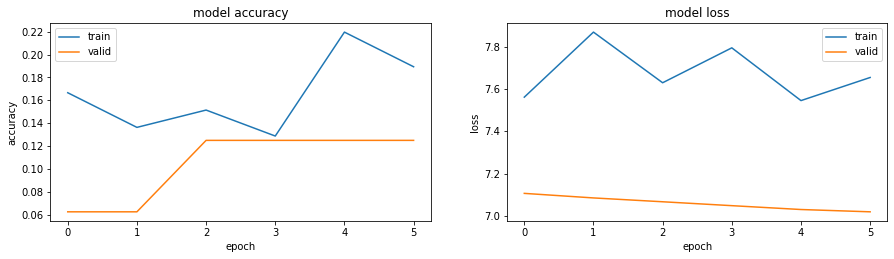


Hyperparameters: [[5.12e+02 1.00e-04 1.00e-01 2.00e+00 7.00e-01 3.20e+01]]
1/1 [==============================] - 0s 254ms/step - loss: 7.0198 - accuracy: 0.1250

Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.31250 to 0.43750, saving model to DR.h5

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 4: val_accuracy did not improve from 0.43750

Epoch 5: val_accuracy did not improve from 0.43750
Epoch 5: early stopping
1/1 [==============================] - 0s 53ms/step - loss: 94.6684 - accuracy: 0.4375

LOSS:	94.66841888427734 	 ACCURACY:	0.4375
[94.66841888427734, 0.4375]



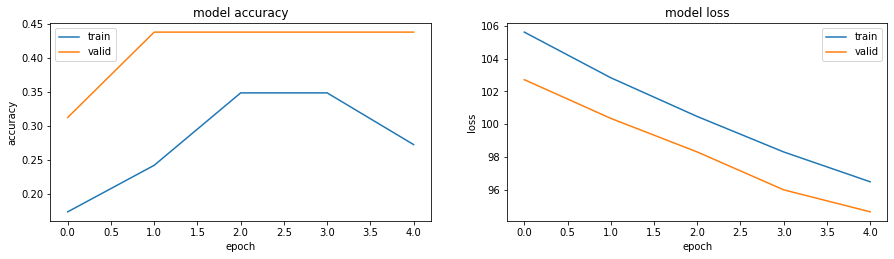


Hyperparameters: [[6.40e+01 1.00e-04 1.00e-02 3.00e+00 7.00e-01 1.28e+02]]
1/1 [==============================] - 0s 279ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.12500

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 3: val_accuracy did not improve from 0.12500

Epoch 4: val_accuracy did not improve from 0.12500
Epoch 4: early stopping
1/1 [==============================] - 0s 33ms/step - loss: 3.2691 - accuracy: 0.0625

LOSS:	3.2691335678100586 	 ACCURACY:	0.0625
[3.2691335678100586, 0.0625]



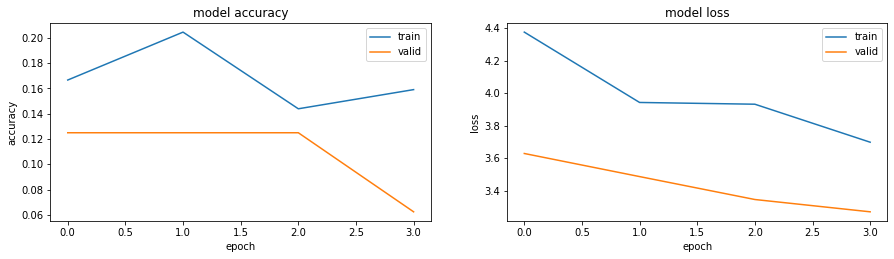


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-02 3.00e+00 7.00e-01 2.56e+02]]
1/1 [==============================] - 0s 299ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 66ms/step - loss: 4.2075 - accuracy: 0.4375

LOSS:	4.207483291625977 	 ACCURACY:	0.4375
[4.207483291625977, 0.4375]



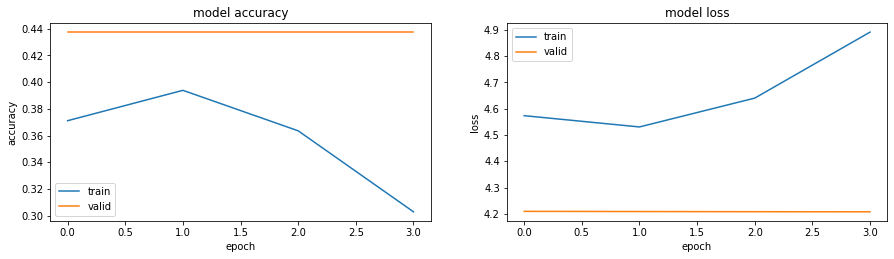


Hyperparameters: [[6.40e+01 1.00e-04 1.00e-01 2.00e+00 3.00e-01 2.56e+02]]
1/1 [==============================] - 0s 238ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.12500 to 0.18750, saving model to DR.h5

Epoch 3: val_accuracy improved from 0.18750 to 0.25000, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.25000

Epoch 5: val_accuracy improved from 0.25000 to 0.31250, saving model to DR.h5

Epoch 6: val_accuracy did not improve from 0.31250

Epoch 7: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 7: val_accuracy did not improve from 0.31250

Epoch 8: val_accuracy did not improve from 0.31250
Epoch 8: early stopping
1/1 [==============================] - 0s 42ms/step - loss: 14.9076 - accuracy: 0.1250

LOSS:	14.90755558013916 	 ACCURACY:	0.125
[14.90755558013916, 0.125]



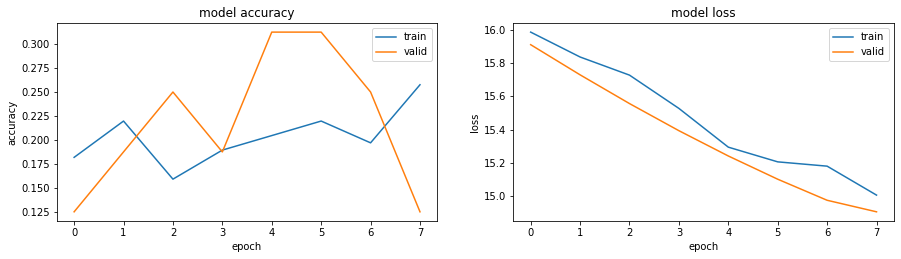




Hyperparameters: [[5.12e+02 1.00e-04 1.00e-02 1.00e+00 5.00e-01 1.28e+02]]
1/1 [==============================] - 0s 254ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.37500 to 0.43750, saving model to DR.h5

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 4: val_accuracy did not improve from 0.43750

Epoch 5: val_accuracy did not improve from 0.43750
Epoch 5: early stopping
1/1 [==============================] - 0s 34ms/step - loss: 11.3643 - accuracy: 0.4375

LOSS:	11.364253044128418 	 ACCURACY:	0.4375
[11.364253044128418, 0.4375]



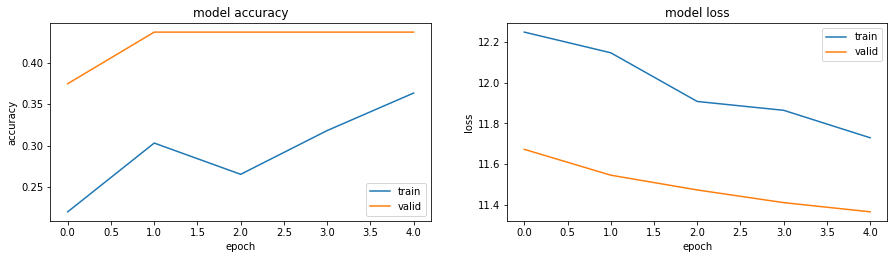


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-02 2.00e+00 5.00e-01 3.20e+01]]
1/1 [==============================] - 0s 321ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.31250

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.31250

Epoch 4: val_accuracy did not improve from 0.31250
Epoch 4: early stopping
1/1 [==============================] - 0s 38ms/step - loss: 4.8664 - accuracy: 0.3125

LOSS:	4.866420745849609 	 ACCURACY:	0.3125
[4.866420745849609, 0.3125]



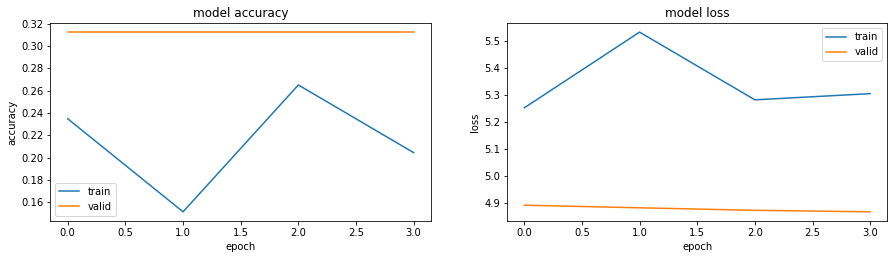


Hyperparameters: [[5.12e+02 1.00e-03 1.00e-02 2.00e+00 7.00e-01 3.20e+01]]
1/1 [==============================] - 0s 224ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 35ms/step - loss: 7.0258 - accuracy: 0.2500

LOSS:	7.0258002281188965 	 ACCURACY:	0.25
[7.0258002281188965, 0.25]



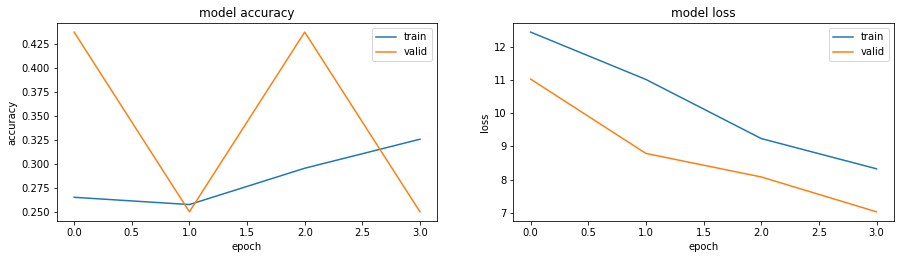


Hyperparameters: [[5.12e+02 1.00e-04 1.00e-02 2.00e+00 3.00e-01 2.56e+02]]
1/1 [==============================] - 0s 245ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.12500

Epoch 3: val_accuracy improved from 0.12500 to 0.43750, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.43750

Epoch 5: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 5: val_accuracy did not improve from 0.43750

Epoch 6: val_accuracy did not improve from 0.43750
Epoch 6: early stopping
1/1 [==============================] - 0s 55ms/step - loss: 11.6184 - accuracy: 0.4375

LOSS:	11.618435859680176 	 ACCURACY:	0.4375
[11.618435859680176, 0.4375]



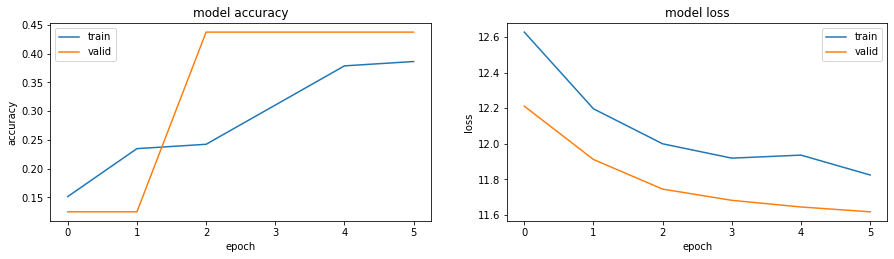


Hyperparameters: [[5.12e+02 1.00e-04 1.00e-03 2.00e+00 5.00e-01 2.56e+02]]
1/1 [==============================] - 0s 249ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.25000

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 3: val_accuracy did not improve from 0.25000

Epoch 4: val_accuracy did not improve from 0.25000
Epoch 4: early stopping
1/1 [==============================] - 0s 34ms/step - loss: 2.5106 - accuracy: 0.1875

LOSS:	2.510622262954712 	 ACCURACY:	0.1875
[2.510622262954712, 0.1875]



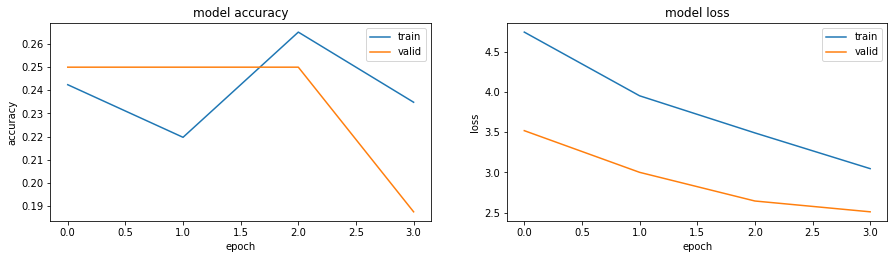


Hyperparameters: [[1.28e+02 1.00e-04 1.00e-02 3.00e+00 3.00e-01 3.20e+01]]
1/1 [==============================] - 0s 151ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: val_accuracy improved from 0.43750 to 0.50000, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 5: val_accuracy did not improve from 0.50000

Epoch 6: val_accuracy improved from 0.50000 to 0.56250, saving model to DR.h5

Epoch 7: val_accuracy did not improve from 0.56250

Epoch 8: ReduceLROnPlateau reducing learning rate to 3.599999909056351e-05.

Epoch 8: val_accuracy did not improve from 0.56250

Epoch 9: val_accuracy did not improve from 0.56250
Epoch 9: early stopping
1/1 [==============================] - 0s 20ms/step - loss: 3.7146 - accuracy: 0.4375

LOSS:	3.7146155834198 	 A

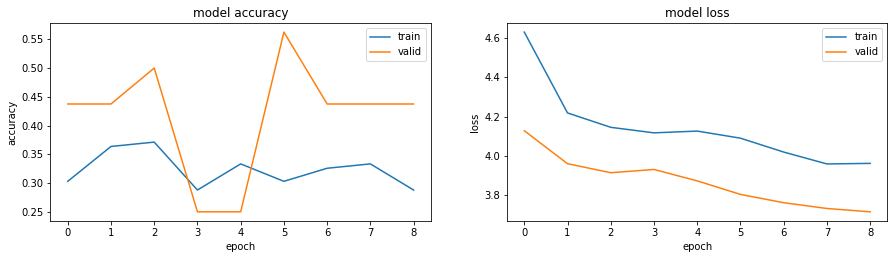


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-02 3.00e+00 7.00e-01 3.20e+01]]
1/1 [==============================] - 0s 145ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 20ms/step - loss: 3.1126 - accuracy: 0.4375

LOSS:	3.112560510635376 	 ACCURACY:	0.4375
[3.112560510635376, 0.4375]



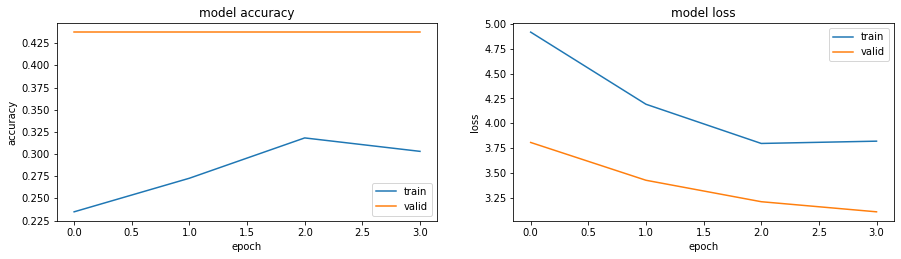


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-02 1.00e+00 7.00e-01 1.28e+02]]
1/1 [==============================] - 0s 143ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: val_accuracy improved from 0.43750 to 0.50000, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 5: val_accuracy did not improve from 0.50000

Epoch 6: val_accuracy improved from 0.50000 to 0.56250, saving model to DR.h5

Epoch 7: val_accuracy did not improve from 0.56250

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0003600000170990825.

Epoch 8: val_accuracy did not improve from 0.56250

Epoch 9: val_accuracy did not improve from 0.56250
Epoch 9: early stopping
1/1 [==============================] - 0s 21ms/step - loss: 2.9388 - accuracy: 0.4375

LOSS:	2.93884539604187 	 

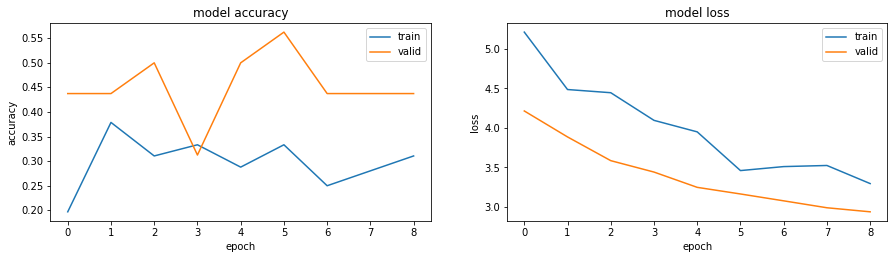


Hyperparameters: [[1.28e+02 1.00e-04 1.00e-02 2.00e+00 3.00e-01 1.28e+02]]
1/1 [==============================] - 0s 168ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.12500

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 3: val_accuracy did not improve from 0.12500

Epoch 4: val_accuracy improved from 0.12500 to 0.18750, saving model to DR.h5

Epoch 5: val_accuracy did not improve from 0.18750

Epoch 6: val_accuracy improved from 0.18750 to 0.43750, saving model to DR.h5

Epoch 7: val_accuracy did not improve from 0.43750

Epoch 8: ReduceLROnPlateau reducing learning rate to 3.599999909056351e-05.

Epoch 8: val_accuracy did not improve from 0.43750

Epoch 9: val_accuracy did not improve from 0.43750
Epoch 9: early stopping
1/1 [==============================] - 0s 24ms/step - loss: 4.0576 - accuracy: 0.4375

LOSS:	4.057604789733887 	

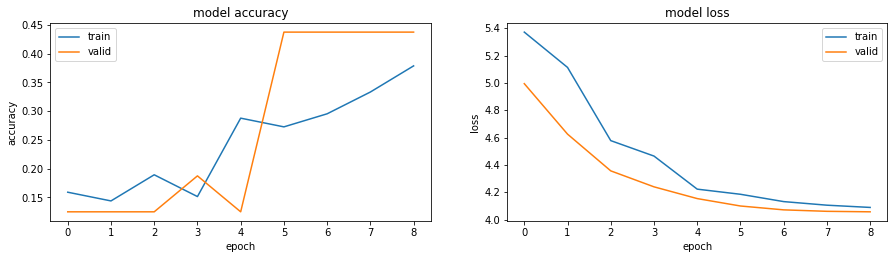


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-03 1.00e+00 7.00e-01 2.56e+02]]
1/1 [==============================] - 0s 146ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 22ms/step - loss: 1.7070 - accuracy: 0.4375

LOSS:	1.7069798707962036 	 ACCURACY:	0.4375
[1.7069798707962036, 0.4375]



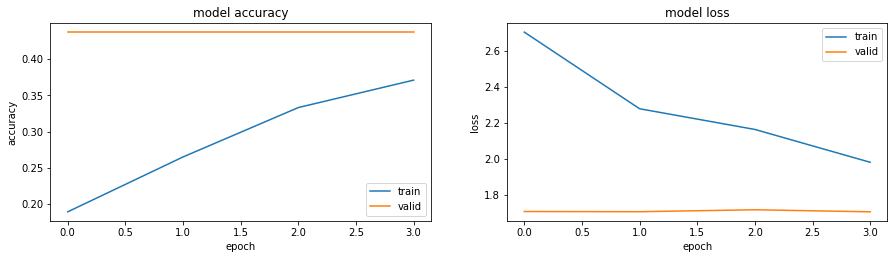


Hyperparameters: [[1.28e+02 1.00e-05 1.00e-02 1.00e+00 5.00e-01 1.28e+02]]
1/1 [==============================] - 0s 141ms/step - loss: 94.6684 - accuracy: 0.4375

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.43750 to 0.50000, saving model to DR.h5

Epoch 3: val_accuracy improved from 0.50000 to 0.56250, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.56250

Epoch 5: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 5: val_accuracy did not improve from 0.56250

Epoch 6: val_accuracy did not improve from 0.56250
Epoch 6: early stopping
1/1 [==============================] - 0s 24ms/step - loss: 4.1500 - accuracy: 0.5625

LOSS:	4.1500244140625 	 ACCURACY:	0.5625
[4.1500244140625, 0.5625]



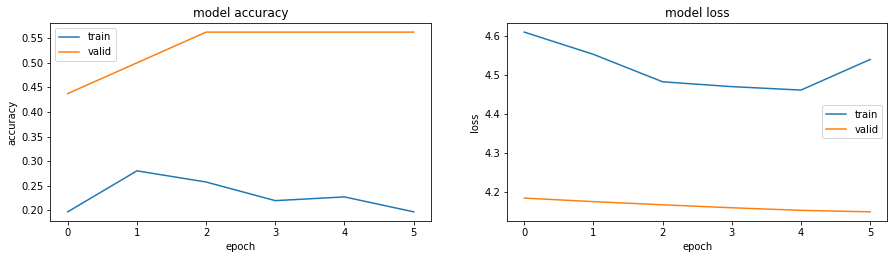


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-01 2.00e+00 5.00e-01 3.20e+01]]
1/1 [==============================] - 0s 161ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.06250

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.06250

Epoch 4: val_accuracy did not improve from 0.06250
Epoch 4: early stopping
1/1 [==============================] - 0s 23ms/step - loss: 29.7022 - accuracy: 0.0625

LOSS:	29.702211380004883 	 ACCURACY:	0.0625
[29.702211380004883, 0.0625]



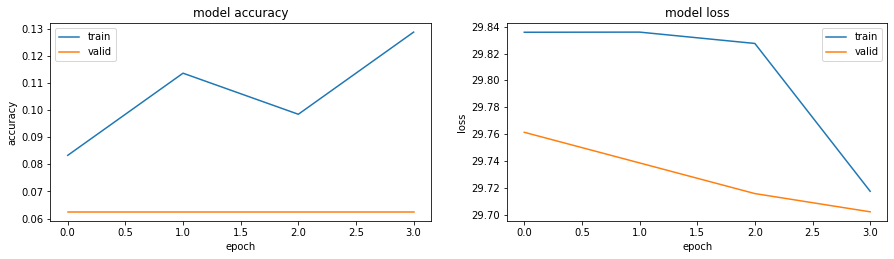


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-03 3.00e+00 5.00e-01 2.56e+02]]
1/1 [==============================] - 0s 153ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.43750 to 0.50000, saving model to DR.h5

Epoch 3: val_accuracy did not improve from 0.50000

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: val_accuracy did not improve from 0.50000
Epoch 5: early stopping
1/1 [==============================] - 0s 26ms/step - loss: 1.8594 - accuracy: 0.4375

LOSS:	1.859406590461731 	 ACCURACY:	0.4375
[1.859406590461731, 0.4375]



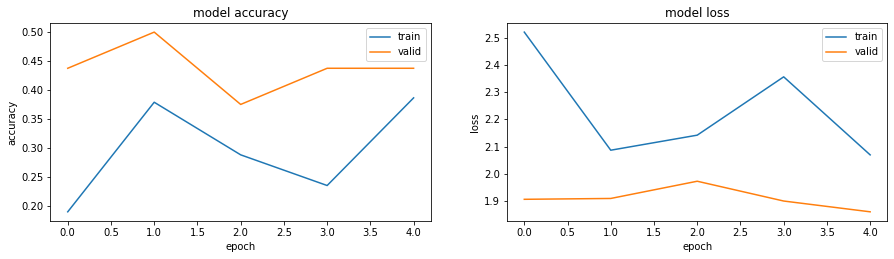


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-03 2.00e+00 7.00e-01 1.28e+02]]
1/1 [==============================] - 0s 156ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.25000

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.25000

Epoch 4: val_accuracy did not improve from 0.25000
Epoch 4: early stopping
1/1 [==============================] - 0s 21ms/step - loss: 1.8789 - accuracy: 0.2500

LOSS:	1.8789209127426147 	 ACCURACY:	0.25
[1.8789209127426147, 0.25]



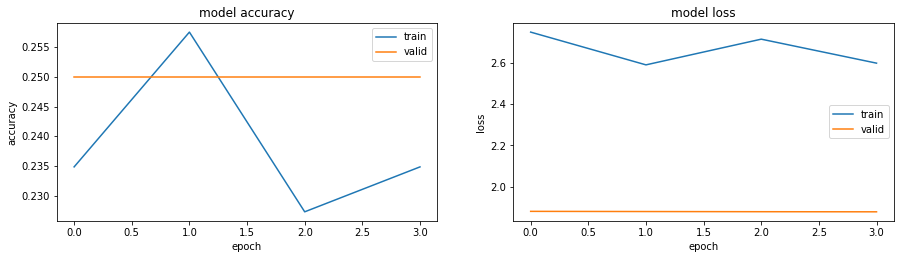


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-01 1.00e+00 3.00e-01 1.28e+02]]
1/1 [==============================] - 0s 150ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.25000

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.25000

Epoch 4: val_accuracy did not improve from 0.25000
Epoch 4: early stopping
1/1 [==============================] - 0s 20ms/step - loss: 28.5574 - accuracy: 0.2500

LOSS:	28.557432174682617 	 ACCURACY:	0.25
[28.557432174682617, 0.25]



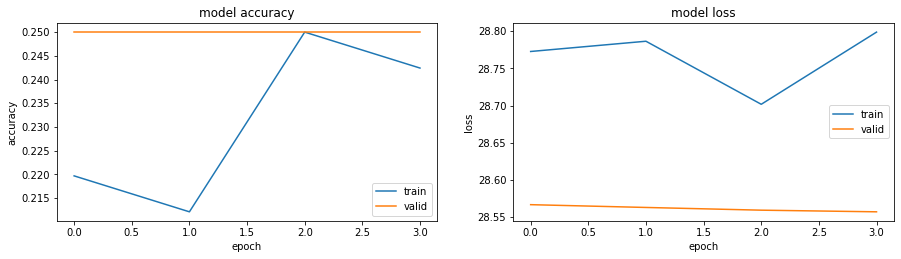


Hyperparameters: [[1.28e+02 1.00e-05 1.00e-02 3.00e+00 3.00e-01 2.56e+02]]
1/1 [==============================] - 0s 145ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.50000

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 3: val_accuracy did not improve from 0.50000

Epoch 4: val_accuracy did not improve from 0.50000
Epoch 4: early stopping
1/1 [==============================] - 0s 21ms/step - loss: 4.2138 - accuracy: 0.5000

LOSS:	4.213770389556885 	 ACCURACY:	0.5
[4.213770389556885, 0.5]



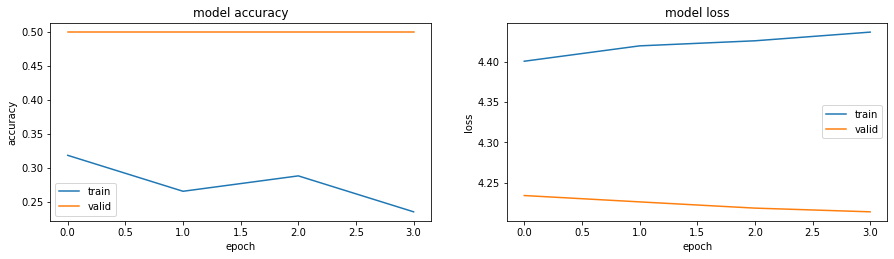


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-01 3.00e+00 5.00e-01 2.56e+02]]
1/1 [==============================] - 0s 150ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 20ms/step - loss: 24.1409 - accuracy: 0.4375

LOSS:	24.140911102294922 	 ACCURACY:	0.4375
[24.140911102294922, 0.4375]



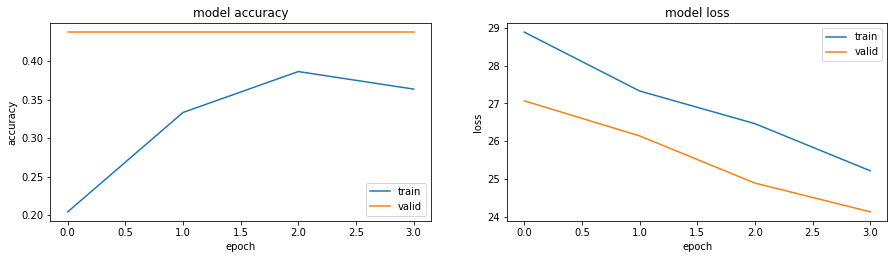


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-01 2.00e+00 3.00e-01 2.56e+02]]
1/1 [==============================] - 0s 142ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.12500

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.12500

Epoch 4: val_accuracy did not improve from 0.12500
Epoch 4: early stopping
1/1 [==============================] - 0s 20ms/step - loss: 28.7799 - accuracy: 0.1250

LOSS:	28.779918670654297 	 ACCURACY:	0.125
[28.779918670654297, 0.125]



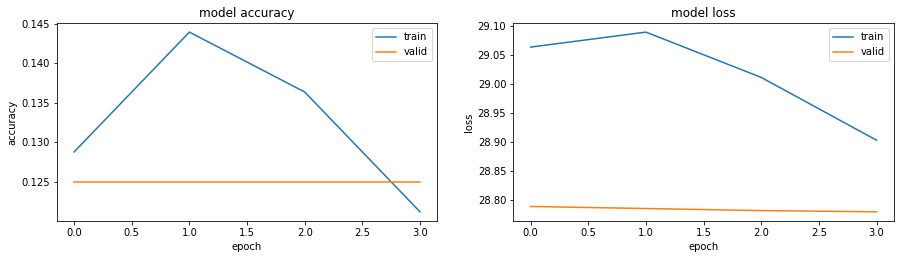


Hyperparameters: [[1.28e+02 1.00e-05 1.00e-03 3.00e+00 5.00e-01 2.56e+02]]
1/1 [==============================] - 0s 151ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.18750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.18750

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 3: val_accuracy did not improve from 0.18750

Epoch 4: val_accuracy did not improve from 0.18750
Epoch 4: early stopping
1/1 [==============================] - 0s 23ms/step - loss: 2.1095 - accuracy: 0.1875

LOSS:	2.1094534397125244 	 ACCURACY:	0.1875
[2.1094534397125244, 0.1875]



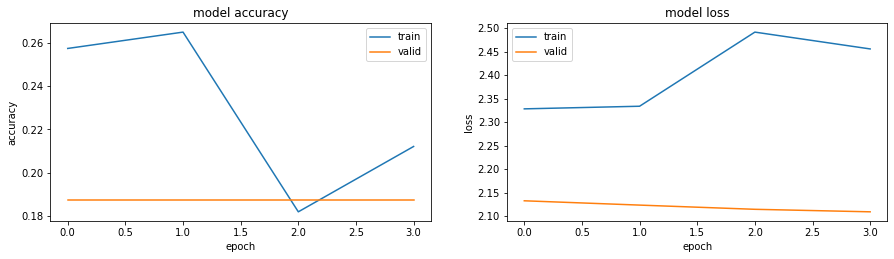


Hyperparameters: [[1.28e+02 1.00e-06 1.00e-03 3.00e+00 5.00e-01 1.28e+02]]
1/1 [==============================] - 0s 149ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.06250

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.06250

Epoch 4: val_accuracy did not improve from 0.06250
Epoch 4: early stopping
1/1 [==============================] - 0s 82ms/step - loss: 2.8781 - accuracy: 0.0625

LOSS:	2.8780853748321533 	 ACCURACY:	0.0625
[2.8780853748321533, 0.0625]



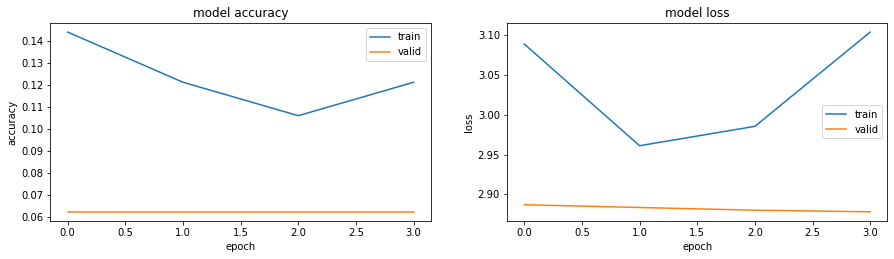


Hyperparameters: [[5.12e+02 1.00e-05 1.00e-02 3.00e+00 3.00e-01 3.20e+01]]
1/1 [==============================] - 0s 151ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.31250 to 0.50000, saving model to DR.h5

Epoch 3: val_accuracy did not improve from 0.50000

Epoch 4: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: val_accuracy did not improve from 0.50000
Epoch 5: early stopping
1/1 [==============================] - 0s 26ms/step - loss: 11.6420 - accuracy: 0.5000

LOSS:	11.642024040222168 	 ACCURACY:	0.5
[11.642024040222168, 0.5]



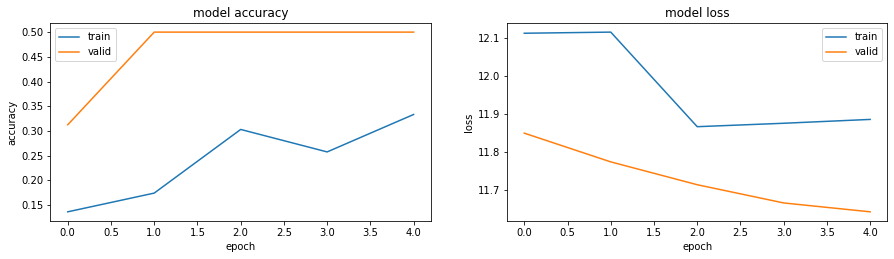


Hyperparameters: [[5.12e+02 1.00e-04 1.00e-02 3.00e+00 3.00e-01 1.28e+02]]
1/1 [==============================] - 0s 146ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 25ms/step - loss: 11.4910 - accuracy: 0.4375

LOSS:	11.491024017333984 	 ACCURACY:	0.4375
[11.491024017333984, 0.4375]



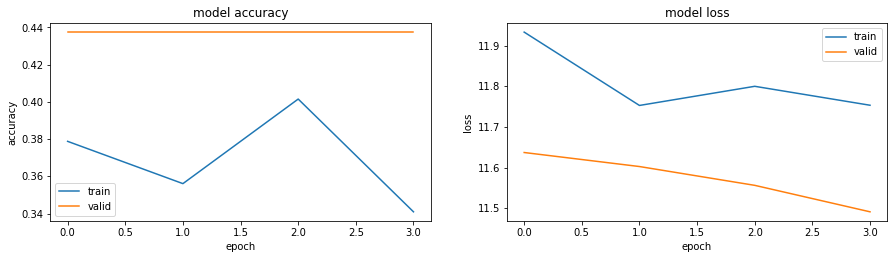


Hyperparameters: [[5.12e+02 1.00e-05 1.00e-02 1.00e+00 5.00e-01 3.20e+01]]
1/1 [==============================] - 0s 140ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.25000

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 3: val_accuracy did not improve from 0.25000

Epoch 4: val_accuracy did not improve from 0.25000
Epoch 4: early stopping
1/1 [==============================] - 0s 35ms/step - loss: 12.0490 - accuracy: 0.2500

LOSS:	12.048990249633789 	 ACCURACY:	0.25
[12.048990249633789, 0.25]



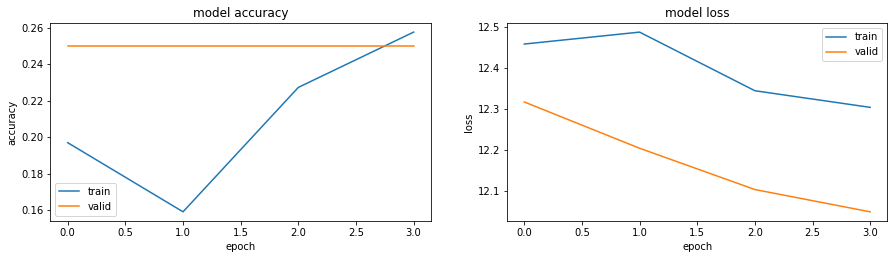


Hyperparameters: [[5.12e+02 1.00e-05 1.00e-02 3.00e+00 3.00e-01 3.20e+01]]
1/1 [==============================] - 0s 142ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to DR.h5

Epoch 2: val_accuracy improved from 0.06250 to 0.25000, saving model to DR.h5

Epoch 3: val_accuracy improved from 0.25000 to 0.37500, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.37500

Epoch 5: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 5: val_accuracy did not improve from 0.37500

Epoch 6: val_accuracy did not improve from 0.37500
Epoch 6: early stopping
1/1 [==============================] - 0s 22ms/step - loss: 11.7695 - accuracy: 0.3750

LOSS:	11.769518852233887 	 ACCURACY:	0.375
[11.769518852233887, 0.375]



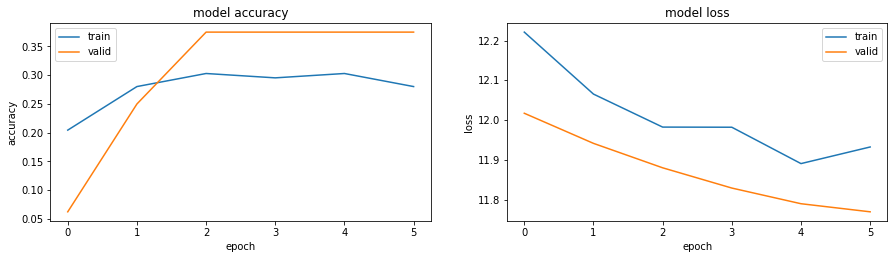


Hyperparameters: [[5.12e+02 1.00e-06 1.00e-02 1.00e+00 7.00e-01 3.20e+01]]
1/1 [==============================] - 0s 144ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.12500

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.12500

Epoch 4: val_accuracy did not improve from 0.12500
Epoch 4: early stopping
1/1 [==============================] - 0s 24ms/step - loss: 12.4865 - accuracy: 0.1250

LOSS:	12.486470222473145 	 ACCURACY:	0.125
[12.486470222473145, 0.125]



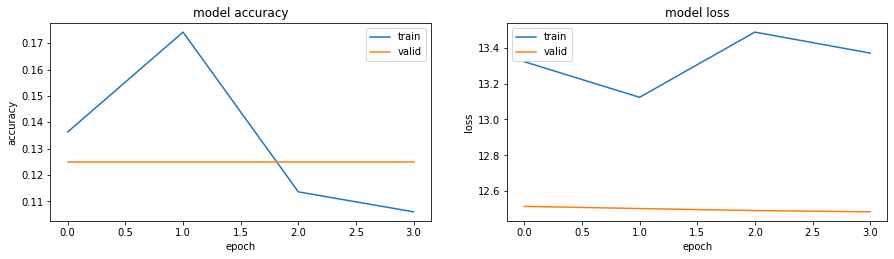


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-01 1.00e+00 7.00e-01 2.56e+02]]
1/1 [==============================] - 0s 147ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: val_accuracy improved from 0.43750 to 0.50000, saving model to DR.h5

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 5: val_accuracy did not improve from 0.50000

Epoch 6: val_accuracy did not improve from 0.50000
Epoch 6: early stopping
1/1 [==============================] - 0s 21ms/step - loss: 21.9617 - accuracy: 0.4375

LOSS:	21.961706161499023 	 ACCURACY:	0.4375
[21.961706161499023, 0.4375]



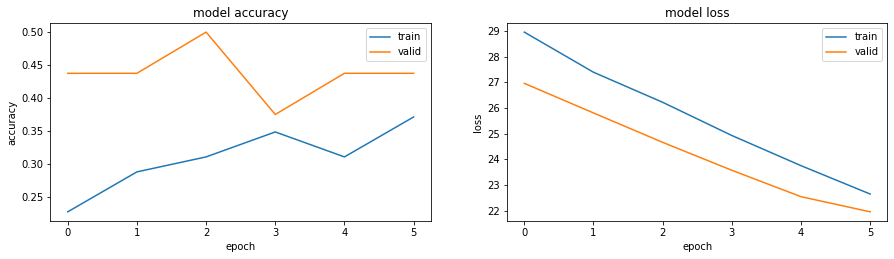


Hyperparameters: [[1.28e+02 1.00e-05 1.00e-02 2.00e+00 7.00e-01 2.56e+02]]
1/1 [==============================] - 0s 146ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.06250

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-06.

Epoch 3: val_accuracy did not improve from 0.06250

Epoch 4: val_accuracy did not improve from 0.06250
Epoch 4: early stopping
1/1 [==============================] - 0s 21ms/step - loss: 4.3678 - accuracy: 0.0625

LOSS:	4.367770671844482 	 ACCURACY:	0.0625
[4.367770671844482, 0.0625]



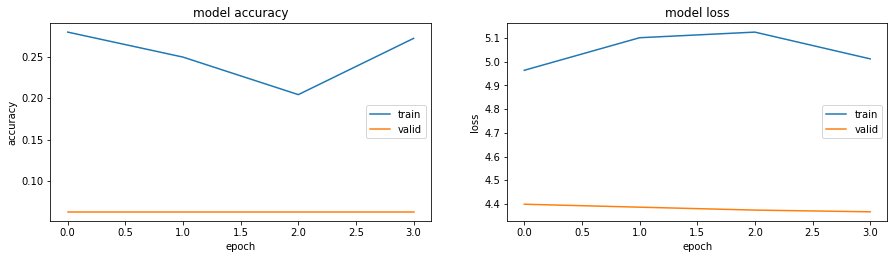


Hyperparameters: [[5.12e+02 1.00e-06 1.00e-02 2.00e+00 3.00e-01 1.28e+02]]
1/1 [==============================] - 0s 149ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.43750

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.43750

Epoch 4: val_accuracy did not improve from 0.43750
Epoch 4: early stopping
1/1 [==============================] - 0s 24ms/step - loss: 12.0499 - accuracy: 0.4375

LOSS:	12.049919128417969 	 ACCURACY:	0.4375
[12.049919128417969, 0.4375]



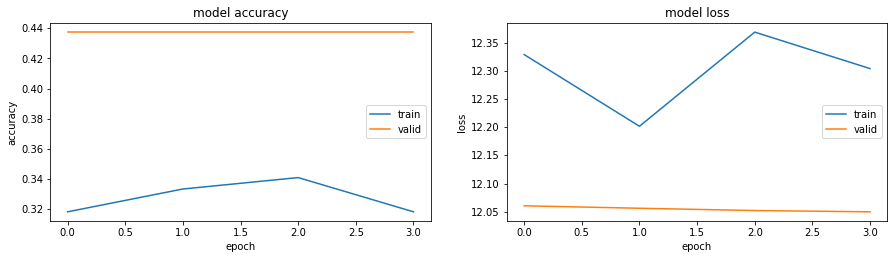


Hyperparameters: [[5.12e+02 1.00e-06 1.00e-01 3.00e+00 5.00e-01 1.28e+02]]
1/1 [==============================] - 0s 148ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.12500, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.12500

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.999999984851456e-07.

Epoch 3: val_accuracy did not improve from 0.12500

Epoch 4: val_accuracy did not improve from 0.12500
Epoch 4: early stopping
1/1 [==============================] - 0s 26ms/step - loss: 105.2304 - accuracy: 0.1250

LOSS:	105.23036193847656 	 ACCURACY:	0.125
[105.23036193847656, 0.125]



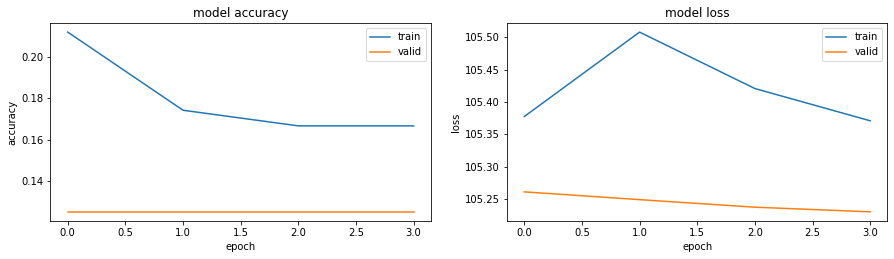


Hyperparameters: [[1.28e+02 1.00e-03 1.00e-03 3.00e+00 7.00e-01 1.28e+02]]
1/1 [==============================] - 0s 147ms/step - loss: 4.1500 - accuracy: 0.5625

Epoch 1: val_accuracy improved from -inf to 0.31250, saving model to DR.h5

Epoch 2: val_accuracy did not improve from 0.31250

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.

Epoch 3: val_accuracy did not improve from 0.31250

Epoch 4: val_accuracy did not improve from 0.31250
Epoch 4: early stopping
1/1 [==============================] - 0s 21ms/step - loss: 2.3899 - accuracy: 0.1250

LOSS:	2.389897346496582 	 ACCURACY:	0.125
[2.389897346496582, 0.125]



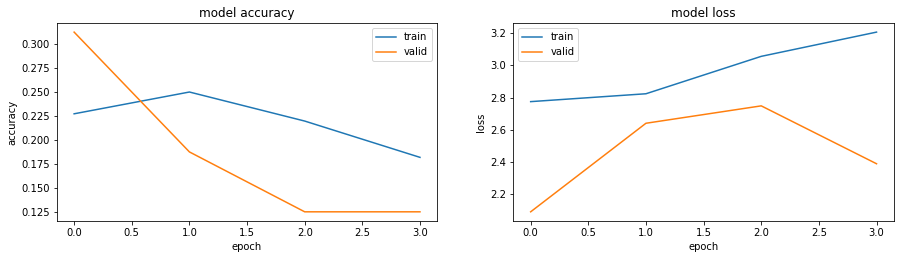

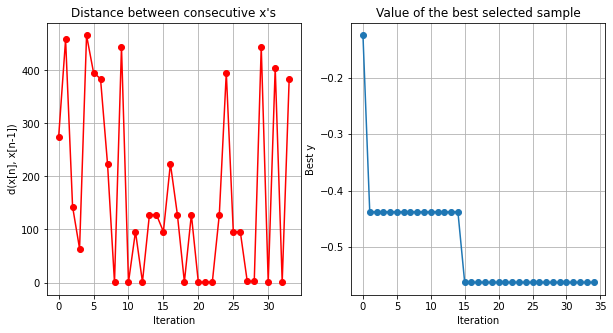

In [12]:
# define the kernel for the Bayesian surrogate model using the "radial basis function" (RBF)
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
# hyperparameter bounds
bounds = [{'name': 'units', 'type': 'discrete', 'domain': (64, 128, 256, 512)},
          {'name': 'learning_rate', 'type': 'discrete', 'domain': (1e-3, 1e-4, 1e-5, 1e-6)},
          {'name': 'l2', 'type': 'discrete', 'domain': (1e-1, 1e-2, 1e-3)},
          {'name': 'activation', 'type': 'discrete', 'domain': (1, 2, 3)},
          {'name': 'rate', 'type': 'discrete', 'domain': (0.3, 0.5, 0.7)},
          {'name': 'batch', 'type': 'discrete', 'domain': (32, 128, 256)}]
# Note: 'activation' domain parameters (1, 2, 3) correspond to strings ('relu', 'elu', 'tanh'); dictionary defined in build_model()
# objective function for the model optimization:
def f(x):
  """objective function of the Bayesian surrogate model"""
  print()
  print("Hyperparameters:", x)
  # Retrieve 'accuracy' from the previously saved model
  try:
    previous_best_model = K.models.load_model('DR_best.h5')
    previous_evaluation = evaluate_model(previous_best_model)
  except Exception:
    previous_best_model = None
  model, lr_reduce, early_stop, checkpoint, batch = build_model(
                                        units=int(x[:,0]),
                                        learning_rate=float(x[:,1]),
                                        l2=float(x[:,2]),
                                        activation=int(x[:,3]),
                                        rate=float(x[:,4]),
                                        batch=int(x[:,5]))
  history = fit_model(model, lr_reduce, early_stop, checkpoint, batch)
  evaluation = evaluate_model(model)
  print()
  print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0],
  evaluation[1]))
  print(evaluation)
  print()
  # compare previous and current validation accuracies
  if not previous_best_model:
    K.models.save_model(model, 'DR_best.h5', overwrite=False,
    include_optimizer=True)
  if previous_best_model and evaluation[1] > previous_evaluation[1]:
    K.models.save_model(model, 'DR_best.h5', overwrite=True,
    include_optimizer=True)
  # Get the dictionary containing each metric and the loss for each epoch
  # history_dict = history.history
  # print(history_dict)
  def plot_history(history):
  #function that plots the model loss and accuracy
    plt.figure(1, figsize = (15,8))
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'])
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'])
    plt.show()
  # plot the model accuracy and loss results
  plot_history(history)
  # delete the instantiated models from memory and clear the session
  del model
  del previous_best_model
  K.backend.clear_session()
  return evaluation[1]
# Initializing X and Y, and adding noise (if need be)
# X_init = np.array([[int(16)]])
# Y_init = f(X_init)
# noise = 0.2
optimizer = BayesianOptimization(f=f,
                                 domain=bounds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.01,
                                 # X=X_init,
                                 # Y=-Y_init,
                                 # noise_var = noise**2,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=True,
                                 verbosity=False)
print()
print("=====================")
print("=====================")
print()
optimizer.run_optimization(max_iter=30, verbosity=False)
optimizer.plot_acquisition()
optimizer.plot_convergence()
optimizer.save_report('bayes_opt.txt')

In [13]:
# print optimized model
activation_dict = {1: 'relu', 2: 'elu', 3: 'tanh'}
print("""
Optimized Parameters:
\t{0}:\t{1}
\t{2}:\t{3}
\t{4}:\t{5}
\t{6}:\t{7}
\t{8}:\t{9}
""".format(bounds[0]["name"], optimizer.x_opt[0],
           bounds[1]["name"], optimizer.x_opt[1],
           bounds[2]["name"], optimizer.x_opt[2],
           bounds[3]["name"], activation_dict[optimizer.x_opt[3]],
           bounds[4]["name"], optimizer.x_opt[4],
           bounds[5]["name"], optimizer.x_opt[5]))
print("optimized accuracy: {0}".format(abs(optimizer.fx_opt)))


Optimized Parameters:
	units:	128.0
	learning_rate:	1e-05
	l2:	0.01
	activation:	relu
	rate:	0.5

optimized accuracy: [0.5625]


In [14]:
# reinstantiate the best model from saved file
best_model = K.models.load_model('DR_best.h5')
best_model.summary()
loss, acc = best_model.evaluate(features_valid, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1920)]            0         
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 246,533
Trainable params: 246,533
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 151ms/step - loss: 4.1500 - accuracy: 0.5625
Restored model, accuracy: 56.25%


In [15]:
best_model.evaluate(features_valid, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 4.1500 - accuracy: 0.5625


[4.1500244140625, 0.5625]

In [16]:
data_path = 'bayes_opt.txt'
with open(data_path, 'r') as f:
  lines = f.read().split('\n')
for line in lines:
  print(line)

----------------------------- GPyOpt Report file -----------------------------------
GPyOpt Version 1.2.1
Date and time:               Thu May 26 22:12:46 2022
Optimization completed:      NO,35 samples collected.
Number initial samples:      5 
Tolerance:                   1e-08.
Optimization time:           74.60003972053528 seconds.

-------------------------------- Problem set up ------------------------------------
Problem name:                no_name
Problem dimension:           6
Number continuous variables  0
Number discrete variables    6
Number bandits               0
Noiseless evaluations:       False
Cost used:                   Used defined cost
Constrains:                  False

------------------------------ Optimization set up ---------------------------------
Normalized outputs:          False
Model type:                  GP
Model update interval:       1
Acquisition type:            EI
Acquisition optimizer:       lbfgs
Acquisition type:            EI
Acquisition opt

Test model with test data

In [17]:
#https://stackoverflow.com/questions/55674648/how-to-load-local-dataset-x-y-using-keras-framework
!pip install image-dataset-loader
from image_dataset_loader import load

(x_train, y_train), (x_test, y_test) = load('/content/output/', ['train', 'test'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#  preprocess the data using the application's preprocess_input method and convert the labels to one-hot encodings
x_test, y_test = preprocess_data(x_test, y_test)

In [19]:

# repeat the same operation with the test data (here used for test)
test_datagen = K.preprocessing.image.ImageDataGenerator(rescale=1./255)  # no augmentation for validation set
test_generator = test_datagen.flow(x_test,
                                 y_test,
                                 batch_size=32,
                                 shuffle=False)
features_test = base_model.predict(test_generator)

In [20]:
# reinstantiate the best model from saved file
loss, acc = best_model.evaluate(features_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

2/2 [==============================] - 0s 8ms/step - loss: 4.2694 - accuracy: 0.3556
Restored model, accuracy: 35.56%


In [21]:
best_model.evaluate(features_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 4.2694 - accuracy: 0.3556


[4.269408226013184, 0.35555556416511536]